## 1. Package Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

1. Import **LogisticRegression** from **sklearn.linear_model** for logistic regressing practice.

## 2. Data Load

In [2]:
missing_values = ['n/a', 'na', '--', '?']
cc_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', 
                 header=None, na_values = missing_values)

1. Replacing missing values to **NaN**.
2. **cc_data** means **credit card data**.
3. Loading the data from **UCI Machine Learning Repository**.

In [3]:
for_explain = {'0':['Gender'], '1':['Age'], '2':['Debt'], '3':['Married'],
               '4':['BankCusotmer'], '5':['EducationLevel'], '6':['Ethnicity'],
               '7':['YearsEmployed'], '8':['PriorDefault'], '9': ['Employed'],
               '10':['CreditScore'], '11':['DriverLicense'], '12':['Citizen'],
               '13':['Zipcode'], '14':['Income'], '15':['ApprovalStatus']}

for_explain

{'0': ['Gender'],
 '1': ['Age'],
 '2': ['Debt'],
 '3': ['Married'],
 '4': ['BankCusotmer'],
 '5': ['EducationLevel'],
 '6': ['Ethnicity'],
 '7': ['YearsEmployed'],
 '8': ['PriorDefault'],
 '9': ['Employed'],
 '10': ['CreditScore'],
 '11': ['DriverLicense'],
 '12': ['Citizen'],
 '13': ['Zipcode'],
 '14': ['Income'],
 '15': ['ApprovalStatus']}

1. Checking the labels.
2. **0** stands for **Gender**, **1** stands for **Age**.

In [4]:
print(cc_data)
print()

print(cc_data.describe())

    0      1       2  3  4   5   6     7  8  9   10 11 12     13   14 15
0    b  30.83   0.000  u  g   w   v  1.25  t  t   1  f  g  202.0    0  +
1    a  58.67   4.460  u  g   q   h  3.04  t  t   6  f  g   43.0  560  +
2    a  24.50   0.500  u  g   q   h  1.50  t  f   0  f  g  280.0  824  +
3    b  27.83   1.540  u  g   w   v  3.75  t  t   5  t  g  100.0    3  +
4    b  20.17   5.625  u  g   w   v  1.71  t  f   0  f  s  120.0    0  +
..  ..    ...     ... .. ..  ..  ..   ... .. ..  .. .. ..    ...  ... ..
685  b  21.08  10.085  y  p   e   h  1.25  f  f   0  f  g  260.0    0  -
686  a  22.67   0.750  u  g   c   v  2.00  f  t   2  t  g  200.0  394  -
687  a  25.25  13.500  y  p  ff  ff  2.00  f  t   1  t  g  200.0    1  -
688  b  17.92   0.205  u  g  aa   v  0.04  f  f   0  f  g  280.0  750  -
689  b  35.00   3.375  u  g   c   h  8.29  f  f   0  t  g    0.0    0  -

[690 rows x 16 columns]

               1           2           7          10           13  \
count  678.000000  690.000000

1. Checking the data.

## 3. Data Preprocessing

In [5]:
## Checking missing values
print('Is there any missing values?:', cc_data.isnull().values.any())
print('Total number of missing values:', cc_data.isnull().values.sum())

print()
print(cc_data.isnull().sum())

Is there any missing values?: True
Total number of missing values: 67

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64


In [6]:
cc_data.fillna(cc_data.mean(), inplace = True)
cc_data.isnull().sum()

0     12
1      0
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
dtype: int64

1. Replacing missing values of numerical data into **mean values**.

In [7]:
for col in cc_data.columns:
    if cc_data[col].dtypes == 'object':
        cc_data[col] = cc_data[col].fillna(cc_data[col].value_counts().index[0])
        
print('Total number of missing values:', cc_data.isnull().values.sum())

Total number of missing values: 0


1. In case of non-numeric data, replacing it into **mode**.

In [8]:
le = LabelEncoder()

for col in cc_data.columns:
    if cc_data[col].dtypes == 'object':
        cc_data[col] = le.fit_transform(cc_data[col])
        
print(cc_data.head())

   0      1      2   3   4   5   6     7   8   9   10  11  12     13   14  15
0   1  30.83  0.000   1   0  12   7  1.25   1   1   1   0   0  202.0    0   0
1   0  58.67  4.460   1   0  10   3  3.04   1   1   6   0   0   43.0  560   0
2   0  24.50  0.500   1   0  10   3  1.50   1   0   0   0   0  280.0  824   0
3   1  27.83  1.540   1   0  12   7  3.75   1   1   5   1   0  100.0    3   0
4   1  20.17  5.625   1   0  12   7  1.71   1   0   0   0   2  120.0    0   0


1. Converting non-numeric data into numeric data using **LabelEncoder()**.
2. For more detail about LabelEncoder(), refer to following link.
3. https://m.blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221592651246&proxyReferer=https:%2F%2Fwww.google.com%2F

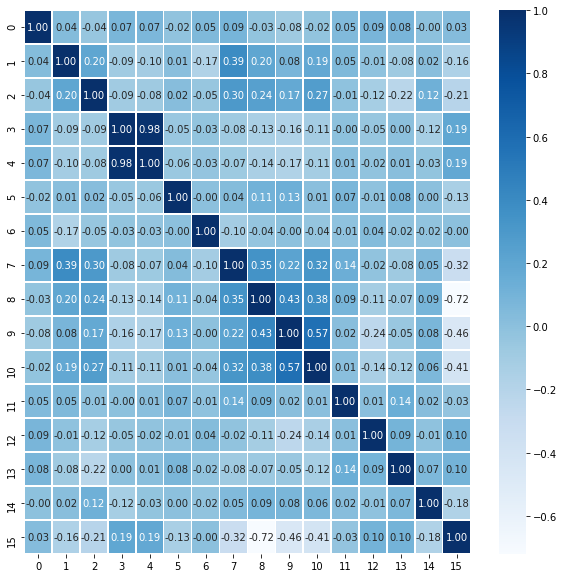

In [9]:
cc_data_df = pd.DataFrame(cc_data)
plt.figure(figsize = (10, 10))
sns.heatmap(data = cc_data_df.corr(), annot = True,
           fmt = '.2f', linewidth = .5, cmap = 'Blues')

1. Through pearson correlation matrix(seaborn heatmap), we can guess that what label is related to **Approval Status**.
2. **7** with **0.32**, **8** with **0.72**, **9** with **0.46**, **10** with **0.41**.

In [10]:
for_explain

{'0': ['Gender'],
 '1': ['Age'],
 '2': ['Debt'],
 '3': ['Married'],
 '4': ['BankCusotmer'],
 '5': ['EducationLevel'],
 '6': ['Ethnicity'],
 '7': ['YearsEmployed'],
 '8': ['PriorDefault'],
 '9': ['Employed'],
 '10': ['CreditScore'],
 '11': ['DriverLicense'],
 '12': ['Citizen'],
 '13': ['Zipcode'],
 '14': ['Income'],
 '15': ['ApprovalStatus']}

3. That is, **YearsEmployed**, **PriorDefaulut**, **Employed**, **CreditScore**.
4. **DriverLicense** and **Zipcode** have nothing to do with ApprovalStatus. So we delete that labels for convenience.

In [11]:
cc_data = cc_data.drop([cc_data.columns[11], cc_data.columns[13]], axis = 1)
print(cc_data.head(3))
print()

## Converting cc_data to array
cc_data = cc_data.values
print(cc_data)

   0      1     2   3   4   5   6     7   8   9   10  12   14  15
0   1  30.83  0.00   1   0  12   7  1.25   1   1   1   0    0   0
1   0  58.67  4.46   1   0  10   3  3.04   1   1   6   0  560   0
2   0  24.50  0.50   1   0  10   3  1.50   1   0   0   0  824   0

[[1.000e+00 3.083e+01 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 5.867e+01 4.460e+00 ... 0.000e+00 5.600e+02 0.000e+00]
 [0.000e+00 2.450e+01 5.000e-01 ... 0.000e+00 8.240e+02 0.000e+00]
 ...
 [0.000e+00 2.525e+01 1.350e+01 ... 0.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 1.792e+01 2.050e-01 ... 0.000e+00 7.500e+02 1.000e+00]
 [1.000e+00 3.500e+01 3.375e+00 ... 0.000e+00 0.000e+00 1.000e+00]]


1. Converting cc_data to array.

## 4. Train/Test Split

In [12]:
X,y = cc_data[:, 0:13], cc_data[:, 13]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

## 5. Scaling

In [14]:
scaler = MinMaxScaler(feature_range = (0, 1))

rescaledX = scaler.fit_transform(X)
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

1. **MinMaxScaler** with setting the range (0, 1)

## 6. Logisitic Regression

In [15]:
logreg = LogisticRegression(random_state = 42)
logreg.fit(rescaledX_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 7. Results

Confusion Matrix:


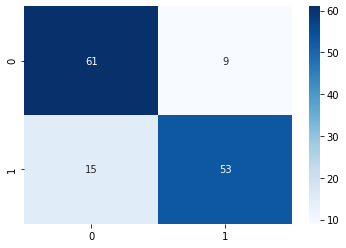

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.87      0.84        70
         1.0       0.85      0.78      0.82        68

    accuracy                           0.83       138
   macro avg       0.83      0.83      0.83       138
weighted avg       0.83      0.83      0.83       138



In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(rescaledX_test)

print('Confusion Matrix:')

cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_matrix, annot = True, cmap = 'Blues')
plt.show()

print('Classification Report:')
print(classification_report(y_test, y_pred))

In [17]:
print('Accuracy at train set:',
      logreg.score(rescaledX_train, y_train))
print('Accuracy at test set:',
     logreg.score(rescaledX_test, y_test))

Accuracy at train set: 0.8695652173913043
Accuracy at test set: 0.8260869565217391


1. We can find that accuracy rate at the test set is almost **82.6%**.

In [18]:
print(logreg.coef_)

[[ 0.10563486 -0.56451126  0.03848481  0.75666732  0.30618413 -0.29984997
  -0.46136578 -0.86839188 -3.42632756 -1.0552497  -0.84456046  0.04702437
  -1.35294932]]


1. By the pearson correlation matrix, we guess that **YearsEmployed**, **PrioirDefualt**, **Employed**, **CreditScore** labels are related to **ApprovalStatus**.
2. Through logistic regression, we can find that **PriorDefault** and **Imcome** labels are the most important values when it comes to **ApprovalStatus** with **-3.42632756**, **-1.35294932**.